In [1]:
import numpy as np
import swiftestio as swio
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
param = swio.read_swifter_param(inparfile)
swifterdat = swio.swifter2xr(param)

Reading Swifter file param.swifter.in


In [3]:
config_file_name = 'config.swiftest.in'
config = swio.read_swiftest_config(config_file_name)
swiftestdat = swio.swiftest2xr(config)

Reading Swiftest file config.swiftest.in


In [4]:
swiftestdat

<xarray.Dataset>
Dimensions:  (id: 209, time: 3651)
Coordinates:
  * id       (id) int64 0 2 3 4 5 6 ... 6000395 6000396 6000397 6000398 6000399
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.648e+03 3.649e+03 3.65e+03
Data variables:
    Mass     (time, id) float64 0.0002959 4.913e-11 7.243e-10 ... nan nan nan
    Radius   (time, id) float64 0.00465 1.631e-05 4.045e-05 ... nan nan nan
    J_2      (time, id) float64 0.0 nan nan nan nan nan ... nan nan nan nan nan
    J_4      (time, id) float64 0.0 nan nan nan nan nan ... nan nan nan nan nan
    px       (time, id) float64 nan 0.3347 -0.4641 ... 1.069 0.6187 -0.5527
    py       (time, id) float64 nan -0.2106 0.5473 0.6083 ... 0.4382 1.45 2.533
    pz       (time, id) float64 nan -0.04792 0.03429 ... -0.07312 0.06803
    vx       (time, id) float64 nan 0.009457 -0.0155 ... -0.01209 -0.009084
    vy       (time, id) float64 nan 0.02511 -0.01319 ... 0.005512 -0.0004694
    vz       (time, id) float64 nan 0.001184 0.0007137 ... 0.001462 0.0007843

In [5]:
swiftdiff = swiftestdat - swifterdat

In [6]:
swiftdiff = swiftdiff.rename({'time' : 'time (d)'})

In [7]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

In [19]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 10]

array([2, 3, 4, 5, 6, 7, 8, 9])

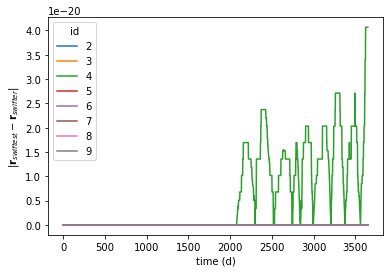

In [21]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
#legend = ax.legend()
#legend.remove()
fig.savefig("rmvs_swifter_comparison-mars_ejecta-rmag.png", facecolor='white', transparent=False, dpi=300)

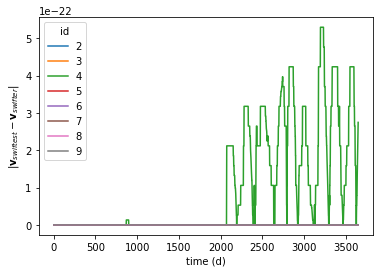

In [23]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
#legend = ax.legend()
#legend.remove
fig.savefig("rmvs_swifter_comparison-mars_ejecta-vmag.png", facecolor='white', transparent=False, dpi=300)

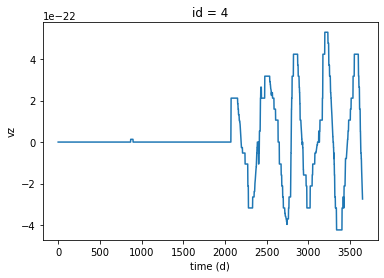

In [26]:
swiftdiff['vz'].sel(id=4).plot.line(x="time (d)")

In [27]:
swiftdiff['vz'].sel(id=4)

<xarray.DataArray 'vz' (time (d): 3651)>
array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -2.48154184e-22, -2.60768688e-22, -2.74623963e-22])
Coordinates:
    id        int64 4
  * time (d)  (time (d)) float64 0.0 1.0 2.0 ... 3.648e+03 3.649e+03 3.65e+03

In [12]:
swiftdiff['pz'].sel(id=6000204)

<xarray.DataArray 'pz' (time (d): 3651)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
    id        int64 6000204
  * time (d)  (time (d)) float64 0.0 1.0 2.0 ... 3.648e+03 3.649e+03 3.65e+03